In [7]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset as fd
df = pd.read_csv("public-debt-ksh-million.csv")
df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,September,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,August,"3,864,875.78","4,054,862.85","7,919,738.63"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB


In [10]:
# Remove commas and convert object columns to float
df['Domestic Debt'] = df['Domestic Debt'].str.replace(',', '').astype(float)
df['External Debt'] = df['External Debt'].str.replace(',', '').astype(float)
df['Total'] = df['Total'].str.replace(',', '').astype(float)
df.head(10)

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,4032368.18,4174371.53,8206739.71
1,2021,November,4008077.30,4109282.85,8117360.15
2,2021,October,3959523.30,4083124.54,8042647.84
3,2021,September,3937777.45,4062504.78,8000282.23
4,2021,August,3864875.78,4054862.85,7919738.63
5,2021,July,3792146.89,4020629.30,7812776.19
6,2021,June,3697093.18,4015299.38,7712392.57
7,2021,May,3686891.72,3799018.81,7485910.53
8,2021,April,3632914.80,3778131.44,7411046.24
9,2021,March,3569840.57,3769866.74,7339707.31


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           262 non-null    int64  
 1   Month          262 non-null    object 
 2   Domestic Debt  262 non-null    float64
 3   External Debt  262 non-null    float64
 4   Total          262 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.4+ KB


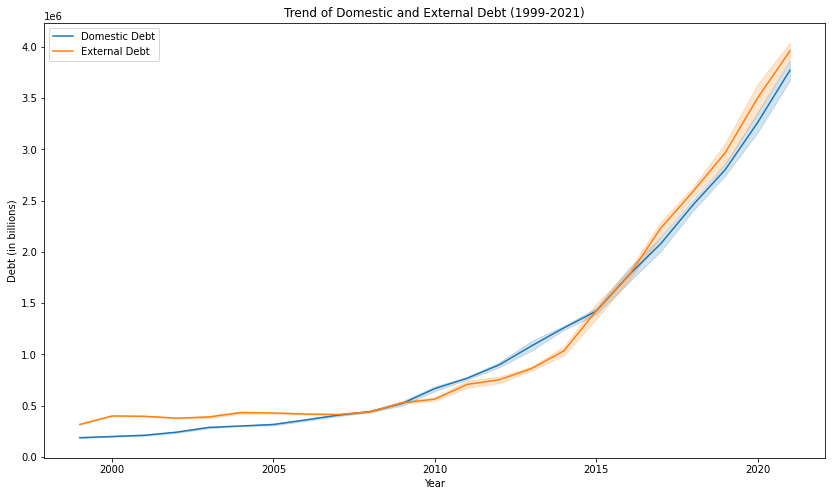

In [13]:
# Trends on domestic and External Debt
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Domestic Debt', label='Domestic Debt')
sns.lineplot(data=df, x='Year', y='External Debt', label='External Debt')
plt.title('Trend of Domestic and External Debt (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.legend()
plt.show()


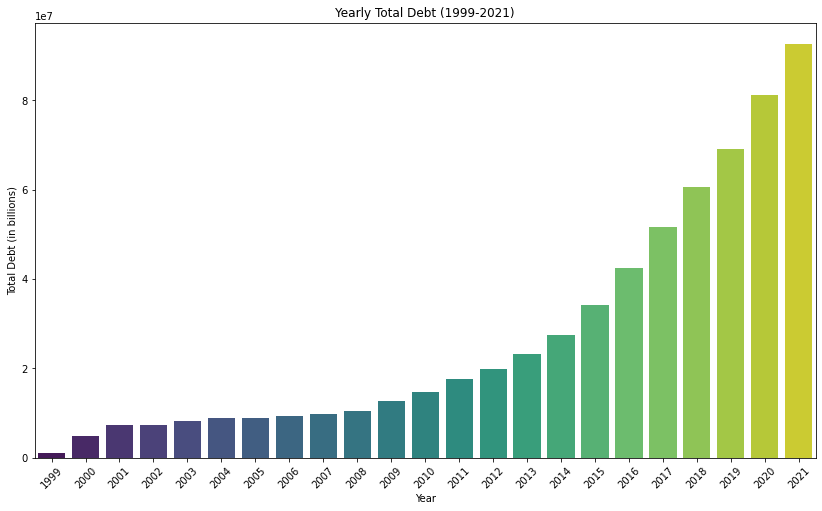

In [14]:
yearly_total_debt = df.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_total_debt, x='Year', y='Total', palette='viridis')
plt.title('Yearly Total Debt (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Total Debt (in billions)')
plt.xticks(rotation=45)
plt.show()


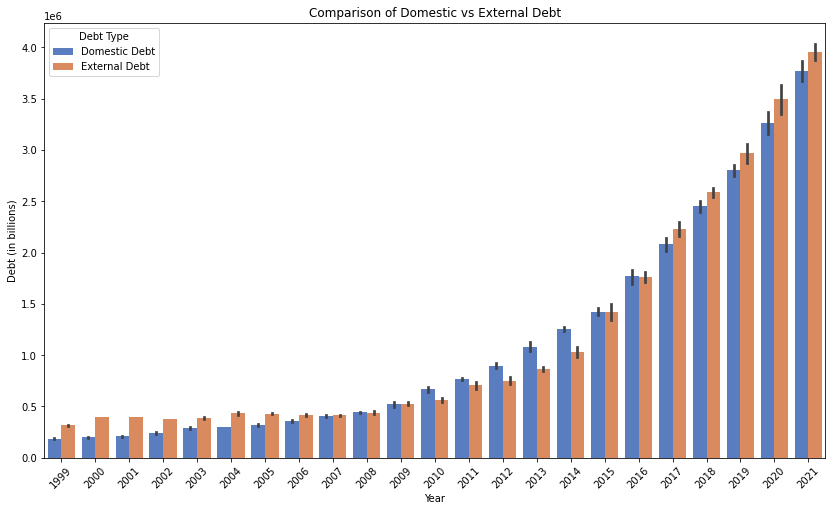

In [15]:
# Comparison of Domestic and External Debts
plt.figure(figsize=(14, 8))
sns.barplot(data=df.melt(id_vars=['Year', 'Month'], value_vars=['Domestic Debt', 'External Debt']), 
            x='Year', y='value', hue='variable', palette='muted')
plt.title('Comparison of Domestic vs External Debt')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.xticks(rotation=45)
plt.legend(title='Debt Type')
plt.show()


In [17]:
def categorize_president(year):
    if 1999 <= year <= 2002:
        return 'Daniel Moi'
    elif 2003 <= year <= 2013:
        return 'Mwai Kibaki'
    elif 2014 <= year <= 2021:
        return 'Uhuru Kenyatta'

# Apply the function to create a new column 'President'
df['President'] = df['Year'].apply(categorize_president)

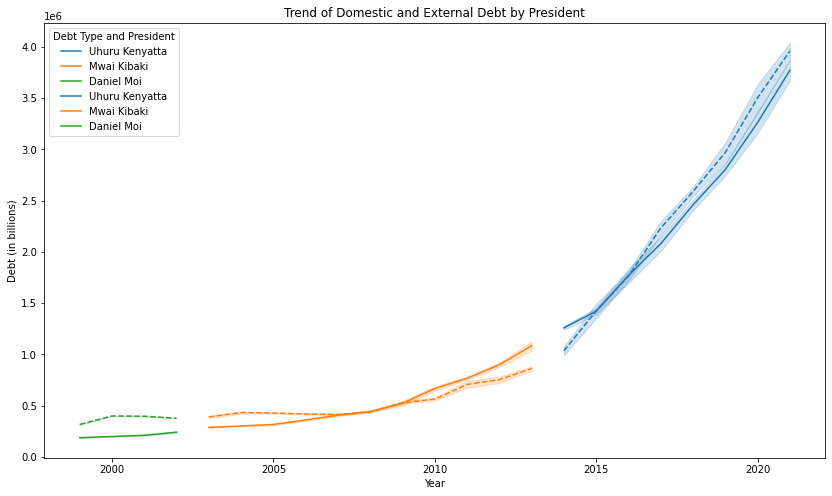

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Domestic Debt', hue='President', palette='tab10')
sns.lineplot(data=df, x='Year', y='External Debt', hue='President', palette='tab10', linestyle='--')
plt.title('Trend of Domestic and External Debt by President')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.legend(title='Debt Type and President')
plt.show()


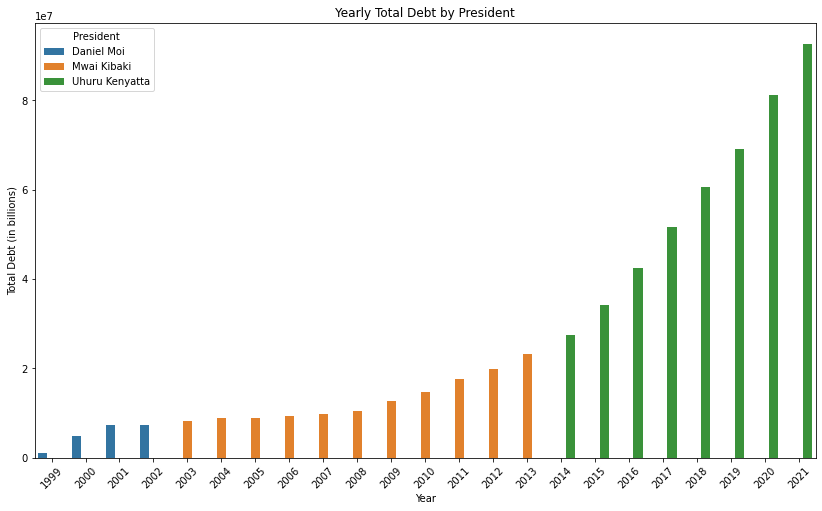

In [21]:
yearly_total_debt = df.groupby(['Year', 'President'])['Total'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_total_debt, x='Year', y='Total', hue='President', palette='tab10')
plt.title('Yearly Total Debt by President')
plt.xlabel('Year')
plt.ylabel('Total Debt (in billions)')
plt.legend(title='President')
plt.xticks(rotation=45)
plt.show()